### Cust_Spend_Data.csv 파일을 통해서 고객의 의류소비, 음료소비, 음식소비 대이터를 통해서 비슷한 고객으로 그루핑 하자

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/Cust_Spend_Data.csv')

In [5]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [8]:
X = df.iloc[ : , 2 : ]

In [12]:
X

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [9]:
import scipy.cluster.hierarchy as sch

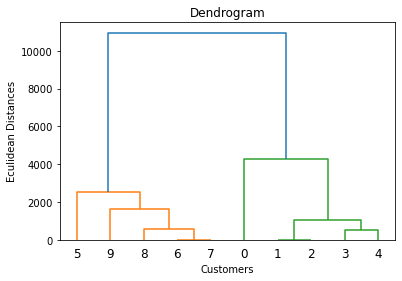

In [10]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eculidean Distances')
        # 삼각함수 이용해서 구하는 거리라는뜻 = > Eculidean
plt.show()

In [11]:
X.shape

(10, 5)

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc = AgglomerativeClustering(n_clusters= 2)

In [17]:
y_pred = hc.fit_predict(X)

In [ ]:
df['Group'] = y_pred

In [19]:
from sklearn.cluster import KMeans

In [25]:
X.shape

(10, 5)

In [26]:
wcss = []
for k in range(2, 7+1) :
    kmeans = KMeans(n_clusters= k , random_state= 76)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [27]:
wcss

[14500293.600000001,
 5387740.75,
 2187714.5,
 854349.4166666667,
 333469.3333333333,
 125160.0]

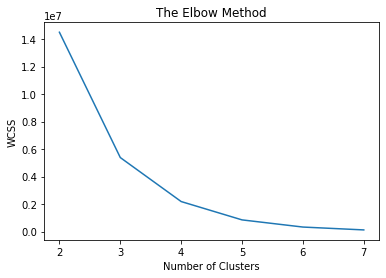

In [28]:
plt.plot(range(2, 7+1) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters= 4, random_state=76)

In [31]:
y_pred2 = kmeans.fit_predict(X)

In [32]:
y_pred2

array([2, 0, 0, 0, 0, 3, 1, 1, 1, 1])

In [33]:
df['Group'] = y_pred2

In [34]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group
0,1,A,10000,2,1,1,0,2
1,2,B,7000,3,0,10,9,0
2,3,C,7000,7,1,3,4,0
3,4,D,6500,5,1,1,4,0
4,5,E,6000,6,0,12,3,0
5,6,F,4000,3,0,1,8,3
6,7,G,2500,5,0,11,2,1
7,8,H,2500,3,0,1,1,1
8,9,I,2000,2,0,2,2,1
9,10,J,1000,4,0,1,7,1
